## Import Library

In [20]:
# Mengimpor pustaka yang diperlukan
import pandas as pd  # Untuk manipulasi data
import numpy as np  # Untuk operasi numerik
import matplotlib.pyplot as plt  # Untuk visualisasi data
import seaborn as sns  # Untuk visualisasi data yang lebih kompleks
from sklearn.model_selection import train_test_split  # Untuk membagi dataset menjadi data latih dan data uji
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Untuk normalisasi data dan encoding kategori
from imblearn.over_sampling import SMOTE # Menggunakan SMOTE untuk menangani ketidakseimbangan kelas
from sklearn.ensemble import RandomForestClassifier  # Untuk model Random Forest
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Untuk mengevaluasi model
import warnings
warnings.filterwarnings('ignore')  # Untuk mengabaikan peringatan yang muncul selama eksekusi


## Install Pip

In [21]:
pip install imbalanced-learn

## Load Dataset

In [3]:
df = pd.read_csv('/content/student.csv')
df.head()

,School,Gender,Age,Address,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,...,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,False
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,False
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,False
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,False
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,False


## Exploratory Data Analysis (EDA)

In [4]:
# Menampilkan informasi dasar tentang dataset
print("Informasi Data Frame:\n")
df_info = df.info()

Informasi Data Frame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   School                       649 non-null    object
 1   Gender                       649 non-null    object
 2   Age                          649 non-null    int64 
 3   Address                      649 non-null    object
 4   Family_Size                  649 non-null    object
 5   Parental_Status              649 non-null    object
 6   Mother_Education             649 non-null    int64 
 7   Father_Education             649 non-null    int64 
 8   Mother_Job                   649 non-null    object
 9   Father_Job                   649 non-null    object
 10  Reason_for_Choosing_School   649 non-null    object
 11  Guardian                     649 non-null    object
 12  Travel_Time                  649 non-null    int64 
 13  Study_Time  

In [5]:
# Menampilkan 5 baris terakhir untuk memastikan konsistensi data
print("5 Baris Terakhir dari Dataset:")
print(df.tail(), "\n")

5 Baris Terakhir dari Dataset:
    School Gender  Age Address Family_Size Parental_Status  Mother_Education  \
644     MS      F   19       R         GT3               T                 2   
645     MS      F   18       U         LE3               T                 3   
646     MS      F   18       U         GT3               T                 1   
647     MS      M   17       U         LE3               T                 3   
648     MS      M   18       R         LE3               T                 3   

     Father_Education Mother_Job Father_Job  ... Free_Time Going_Out  \
644                 3   services      other  ...         4         2   
645                 1    teacher   services  ...         3         4   
646                 1      other      other  ...         1         1   
647                 1   services   services  ...         4         5   
648                 2   services      other  ...         4         1   

     Weekend_Alcohol_Consumption  Weekday_Alcohol_Consu

In [6]:
# Menampilkan shape dataset (jumlah baris dan kolom)
print(f"Dataset memiliki {df.shape[0]} baris dan {df.shape[1]} kolom.\n")

Dataset memiliki 649 baris dan 34 kolom.



In [7]:
# Menampilkan tipe data setiap kolom dalam dataset
print("Tipe Data Setiap Kolom:")
print(df.dtypes, "\n")

Tipe Data Setiap Kolom:
School                         object
Gender                         object
Age                             int64
Address                        object
Family_Size                    object
Parental_Status                object
Mother_Education                int64
Father_Education                int64
Mother_Job                     object
Father_Job                     object
Reason_for_Choosing_School     object
Guardian                       object
Travel_Time                     int64
Study_Time                      int64
Number_of_Failures              int64
School_Support                 object
Family_Support                 object
Extra_Paid_Class               object
Extra_Curricular_Activities    object
Attended_Nursery               object
Wants_Higher_Education         object
Internet_Access                object
In_Relationship                object
Family_Relationship             int64
Free_Time                       int64
Going_Out                 

In [8]:
# Memeriksa jumlah nilai yang hilang (missing values) pada setiap kolom
print("Jumlah Missing Values per Kolom:")
print(df.isnull().sum(), "\n")

Jumlah Missing Values per Kolom:
School                         0
Gender                         0
Age                            0
Address                        0
Family_Size                    0
Parental_Status                0
Mother_Education               0
Father_Education               0
Mother_Job                     0
Father_Job                     0
Reason_for_Choosing_School     0
Guardian                       0
Travel_Time                    0
Study_Time                     0
Number_of_Failures             0
School_Support                 0
Family_Support                 0
Extra_Paid_Class               0
Extra_Curricular_Activities    0
Attended_Nursery               0
Wants_Higher_Education         0
Internet_Access                0
In_Relationship                0
Family_Relationship            0
Free_Time                      0
Going_Out                      0
Weekend_Alcohol_Consumption    0
Weekday_Alcohol_Consumption    0
Health_Status                  0
Number_of_

In [9]:
# Memeriksa dan menampilkan jumlah duplikasi data dalam dataset
print(f"Jumlah Data yang Duplikat: {df.duplicated().sum()}\n")

Jumlah Data yang Duplikat: 0



In [10]:
df.describe()

,Age,Mother_Education,Father_Education,Travel_Time,Study_Time,Number_of_Failures,Family_Relationship,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


## Preprocessing Dataset

In [16]:
label_encoder = LabelEncoder()

# Kolom yang hanya memiliki dua kategori (misalnya, 'Gender')
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Kolom dengan lebih dari dua kategori, akan diubah menjadi One-Hot Encoding
df = pd.get_dummies(df, drop_first=True)

# Menampilkan 5 baris pertama setelah encoding
df.head()

,Gender,Age,Mother_Education,Father_Education,Travel_Time,Study_Time,Number_of_Failures,Family_Relationship,Free_Time,Going_Out,...,Guardian_mother,Guardian_other,School_Support_yes,Family_Support_yes,Extra_Paid_Class_yes,Extra_Curricular_Activities_yes,Attended_Nursery_yes,Wants_Higher_Education_yes,Internet_Access_yes,In_Relationship_yes
0,0,18,4,4,2,2,0,4,3,4,...,True,False,True,False,False,False,True,True,False,False
1,0,17,1,1,1,2,0,5,3,3,...,False,False,False,True,False,False,False,True,True,False
2,0,15,1,1,1,2,0,4,3,2,...,True,False,True,False,False,False,True,True,True,False
3,0,15,4,2,1,3,0,3,2,2,...,True,False,False,True,False,True,True,True,True,True
4,0,16,3,3,1,2,0,4,3,2,...,False,False,False,True,False,False,True,True,False,False


In [18]:
numerical_features = ['Age', 'Mother_Education', 'Father_Education', 'Travel_Time',
                      'Study_Time', 'Number_of_Failures', 'Family_Relationship', 'Free_Time',
                      'Going_Out', 'Weekend_Alcohol_Consumption', 'Weekday_Alcohol_Consumption',
                      'Health_Status', 'Number_of_Absences', 'Grade_1', 'Grade_2', 'Final_Grade']

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Menampilkan 5 baris pertama setelah normalisasi
df.head()

,Gender,Age,Mother_Education,Father_Education,Travel_Time,Study_Time,Number_of_Failures,Family_Relationship,Free_Time,Going_Out,...,Guardian_mother,Guardian_other,School_Support_yes,Family_Support_yes,Extra_Paid_Class_yes,Extra_Curricular_Activities_yes,Attended_Nursery_yes,Wants_Higher_Education_yes,Internet_Access_yes,In_Relationship_yes
0,0,1.031695,1.310216,1.540715,0.576718,0.083653,-0.374305,0.072606,-0.171647,0.693785,...,True,False,True,False,False,False,True,True,False,False
1,0,0.210137,-1.336039,-1.188832,-0.760032,0.083653,-0.374305,1.119748,-0.171647,-0.157380,...,False,False,False,True,False,False,False,True,True,False
2,0,-1.432980,-1.336039,-1.188832,-0.760032,0.083653,-0.374305,0.072606,-0.171647,-1.008546,...,True,False,True,False,False,False,True,True,True,False
3,0,-1.432980,1.310216,-0.278983,-0.760032,1.290114,-0.374305,-0.974536,-1.123771,-1.008546,...,True,False,False,True,False,True,True,True,True,True
4,0,-0.611422,0.428131,0.630866,-0.760032,0.083653,-0.374305,0.072606,-0.171647,-1.008546,...,False,False,False,True,False,False,True,True,False,False


In [22]:
# Memisahkan fitur dan target
X = df.drop('Dropped_Out', axis=1)
y = df['Dropped_Out']

# Menggunakan SMOTE untuk menangani ketidakseimbangan kelas
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Menampilkan hasil setelah SMOTE
print(f"Jumlah data setelah SMOTE: {y_resampled.value_counts()}")


Jumlah data setelah SMOTE: Dropped_Out
False    549
True     549
Name: count, dtype: int64


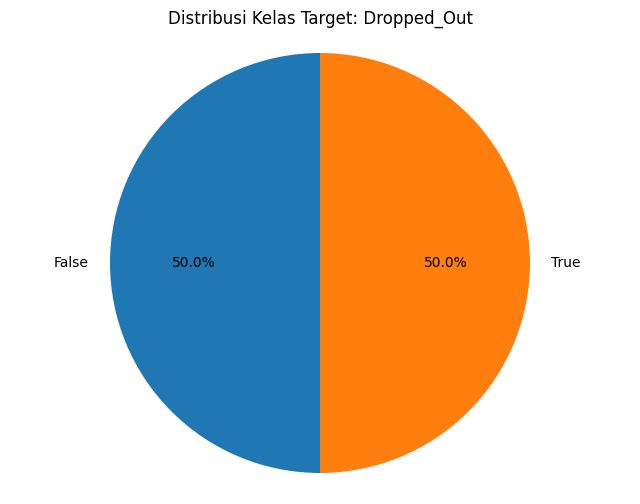

In [23]:
# Menghitung distribusi kelas target
dropped_out_distribution = y_resampled.value_counts()

# Membuat pie chart
plt.figure(figsize=(8, 6))
plt.pie(dropped_out_distribution, labels=dropped_out_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribusi Kelas Target: Dropped_Out")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

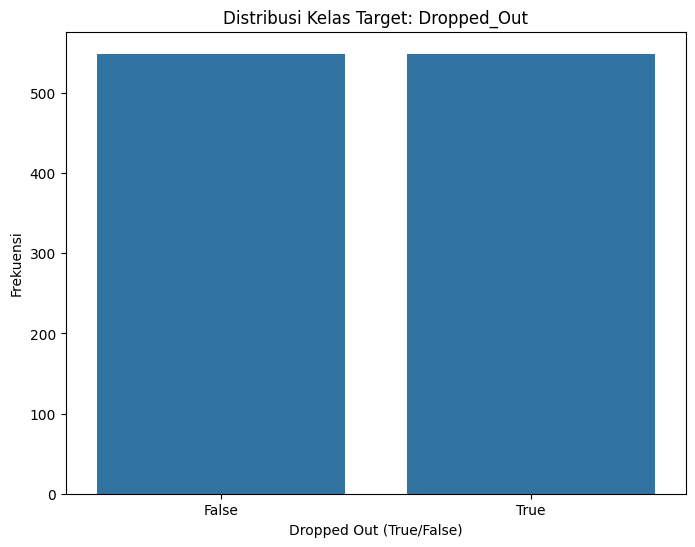

In [24]:
# Visualisasi distribusi target 'Dropped_Out' menggunakan countplot
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled)
plt.title("Distribusi Kelas Target: Dropped_Out")
plt.xlabel("Dropped Out (True/False)")
plt.ylabel("Frekuensi")
plt.show()

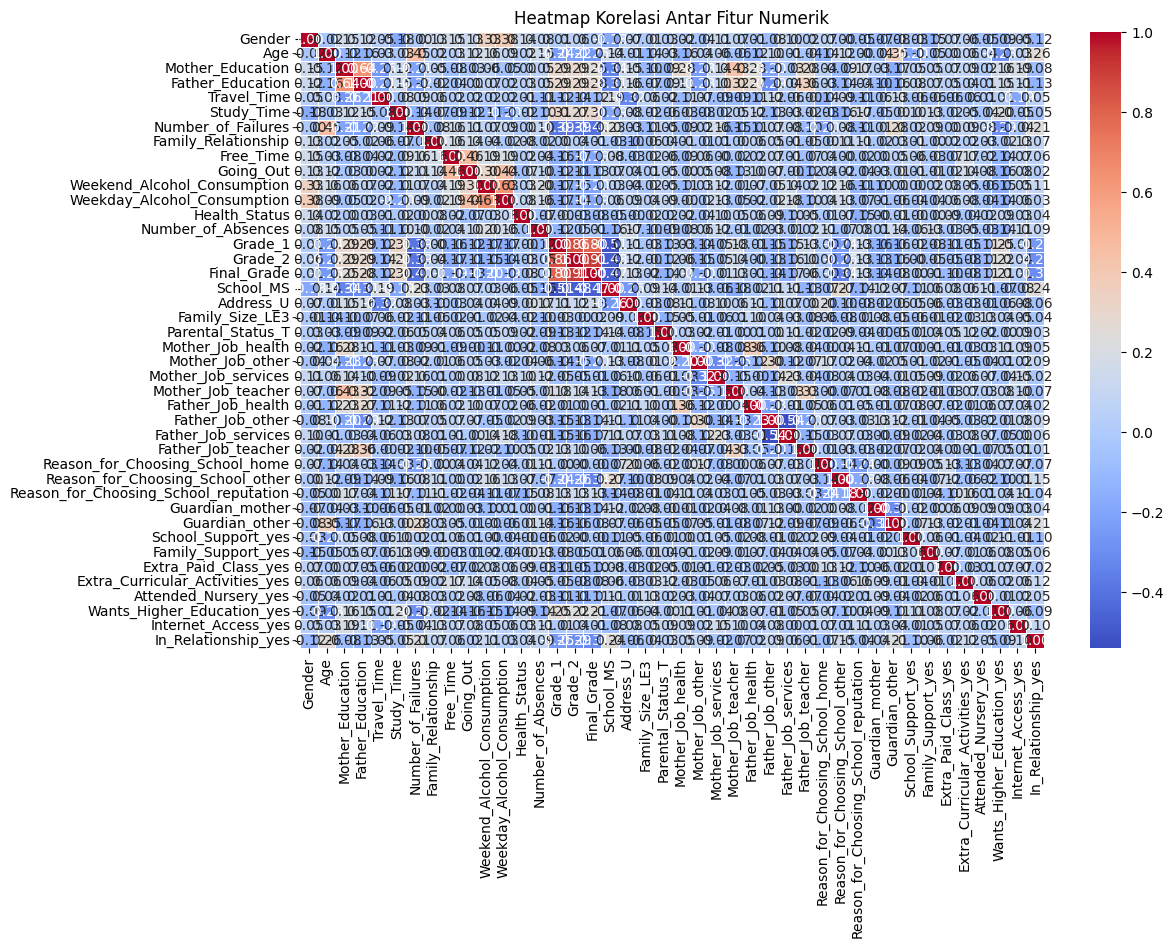

In [25]:
# Menghitung korelasi antar fitur numerik
correlation_matrix = X_resampled.corr()

# Membuat heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur Numerik")
plt.show()


## Modeling

In [32]:
# Memisahkan Data Latih dan Uji
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Menampilkan informasi hasil pemisahan
print(f"Data Latih: {X_train.shape[0]} baris, Data Uji: {X_test.shape[0]} baris")


Data Latih: 878 baris, Data Uji: 220 baris


In [33]:
# Mengimpor GridSearchCV
from sklearn.model_selection import GridSearchCV

# Menentukan parameter yang akan di-tune
param_grid = {
    'n_estimators': [100, 200, 300],  # Jumlah pohon dalam hutan
    'max_depth': [10, 20, None],  # Kedalaman maksimal pohon
    'min_samples_split': [2, 5, 10],  # Jumlah sampel minimum untuk membagi simpul
    'min_samples_leaf': [1, 2, 4]  # Jumlah sampel minimum untuk menjadi daun
}

# Menggunakan GridSearchCV untuk menemukan parameter terbaik
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,  # Cross-validation dengan 5 fold
                           scoring='accuracy',  # Metrik evaluasi
                           verbose=2,  # Menampilkan progress
                           n_jobs=-1)  # Menggunakan semua core CPU

# Menjalankan GridSearchCV untuk mencari parameter terbaik
grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik yang ditemukan
print("Best Parameters from GridSearchCV:")
print(grid_search.best_params_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters from GridSearchCV:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [34]:
# Membuat model Random Forest dengan parameter terbaik
best_rf_model = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'],
                                       max_depth=grid_search.best_params_['max_depth'],
                                       min_samples_split=grid_search.best_params_['min_samples_split'],
                                       min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                       random_state=42)

# Melatih model dengan data latih
best_rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, random_state=42)

In [35]:
# Melakukan prediksi pada data uji
y_pred = best_rf_model.predict(X_test)

# Evaluasi model - Menghitung akurasi
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy * 100:.2f}%")


Akurasi Model: 100.00%


In [36]:
# Menampilkan classification report (precision, recall, f1-score)
from sklearn.metrics import classification_report

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       114
        True       1.00      1.00      1.00       106

    accuracy                           1.00       220
   macro avg       1.00      1.00      1.00       220
weighted avg       1.00      1.00      1.00       220



In [37]:
# Menampilkan confusion matrix
from sklearn.metrics import confusion_matrix

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Confusion Matrix:
[[114   0]
 [  0 106]]


In [38]:
from sklearn.model_selection import cross_val_score

# Melakukan cross-validation pada model Random Forest
cross_val_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='accuracy')

# Menampilkan hasil cross-validation
print(f"Cross-validation scores: {cross_val_scores}")
print(f"Mean cross-validation score: {cross_val_scores.mean() * 100:.2f}%")


Cross-validation scores: [1. 1. 1. 1. 1.]
Mean cross-validation score: 100.00%


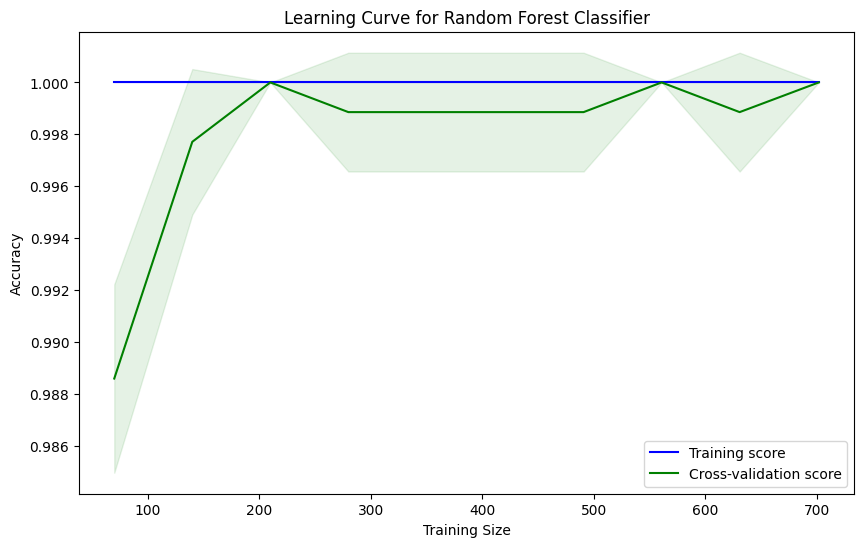

In [39]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Menghitung learning curve
train_sizes, train_scores, test_scores = learning_curve(best_rf_model,
                                                         X_train, y_train, cv=5, scoring='accuracy',
                                                         train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

# Menghitung rata-rata dan deviasi standar untuk skor pelatihan dan pengujian
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training score", color="blue")
plt.plot(train_sizes, test_mean, label="Cross-validation score", color="green")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="green")
plt.title("Learning Curve for Random Forest Classifier")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


## Deployment dan penyimpanan model

In [45]:
import joblib

# Menyimpan model yang sudah dilatih menggunakan joblib
joblib.dump(best_rf_model, 'random_forest_model.pkl')  # Model terbaik dengan parameter yang sudah dituning
print("Model berhasil disimpan.")


Model berhasil disimpan.


In [49]:
# Memuat model yang telah disimpan
loaded_model = joblib.load('random_forest_model.pkl')
print("Model berhasil dimuat.")


Model berhasil dimuat.


In [56]:
# Misalkan data baru yang ingin diprediksi
new_data = [[18, 3, 3, 2, 1, 1, 4, 3, 4, 2, 2, 3, 1, 5, 10, 11, 10]]  # Contoh data baru

# Membuat DataFrame dari data baru
X_new_data = pd.DataFrame(new_data, columns=["Age", "Mother_Education", "Father_Education", "Travel_Time",
                                              "Study_Time", "Number_of_Failures", "Family_Relationship", "Free_Time",
                                              "Going_Out", "Weekend_Alcohol_Consumption", "Weekday_Alcohol_Consumption",
                                              "Health_Status", "Number_of_Absences", "Grade_1", "Grade_2", "Final_Grade",
                                              "Dropped_Out"])

# Pastikan kategori untuk fitur kategorikal ada dalam data baru
X_new_data["Gender"] = ["M"]  # Misalnya nilai untuk Gender
X_new_data["Family_Size"] = ["GT3"]  # Misalnya nilai untuk Family_Size
X_new_data["Parental_Status"] = ["T"]  # Misalnya nilai untuk Parental_Status
X_new_data["Mother_Job"] = ["teacher"]  # Misalnya nilai untuk Mother_Job
X_new_data["Father_Job"] = ["services"]  # Misalnya nilai untuk Father_Job
X_new_data["School"] = ["GP"]  # Misalnya nilai untuk School
X_new_data["Address"] = ["U"]  # Misalnya nilai untuk Address

# Lakukan One-Hot Encoding untuk kolom kategorikal
categorical_columns = ['Gender', 'Family_Size', 'Parental_Status', 'Mother_Job', 'Father_Job', 'School', 'Address']
X_new_data_encoded = pd.get_dummies(X_new_data[categorical_columns])

# Gabungkan dengan kolom numerik
X_new_data = pd.concat([X_new_data.drop(columns=categorical_columns), X_new_data_encoded], axis=1)

# Menambahkan kolom yang hilang pada data baru (kolom yang ada pada data latih tapi tidak ada pada data baru)
X_new_data = X_new_data.reindex(columns=X.columns, fill_value=0)

# Melakukan prediksi pada data baru
y_new_pred = loaded_model.predict(X_new_data)

# Menampilkan hasil prediksi
print("Prediksi untuk data baru:", y_new_pred[0])


Prediksi untuk data baru: False


In [58]:
# Membuat model RandomForest dengan class_weight 'balanced' untuk memberikan bobot lebih pada kelas yang lebih jarang
best_rf_model_weighted = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'],
                                               max_depth=grid_search.best_params_['max_depth'],
                                               min_samples_split=grid_search.best_params_['min_samples_split'],
                                               min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                               class_weight='balanced',  # Menambahkan penyesuaian untuk ketidakseimbangan kelas
                                               random_state=42)

# Melatih model dengan data latih
best_rf_model_weighted.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred_weighted = best_rf_model_weighted.predict(X_test)

# Evaluasi model dengan akurasi
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
print(f"Akurasi Model dengan Class Weighting: {accuracy_weighted * 100:.2f}%")

# Menampilkan classification report
print("\nClassification Report dengan Class Weighting:")
print(classification_report(y_test, y_pred_weighted))

# Melakukan prediksi pada data baru
y_new_pred_weighted = best_rf_model_weighted.predict(X_new_data)

# Menampilkan hasil prediksi
print(f"Prediksi untuk data baru (dengan class_weight): {y_new_pred_weighted[0]}")


Akurasi Model dengan Class Weighting: 100.00%

Classification Report dengan Class Weighting:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       114
        True       1.00      1.00      1.00       106

    accuracy                           1.00       220
   macro avg       1.00      1.00      1.00       220
weighted avg       1.00      1.00      1.00       220

Prediksi untuk data baru (dengan class_weight): False
